# Predicting Credit Card Default
Authors: Hardique Manilal


# 1.	 Introduction

In this assigment we will implementing models and theory that we have learned in in lecturtes.

the code will be spit into:
- data importing
- data transformation and Exploration
  - Standardizing using PCA
  - spliting
- Model training/validation
  - Different models ( Classification tree classifier, Random forest classifier and Naive Bayes classifier )
  - compare the models with accuracy, precision and recall
- Final predictions on test set
  - apply the test data 


### Setup
Import packages that are used in this notebook. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve 


##improting the estimator object (model) 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


C:\Users\hardi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 2.	Data Import


In [2]:
# please replace the string to the location to the .cvs file below
location_training_data  = 'data/CreditCard_train.csv'
location_test_data = 'datta/CreditCard_test.csv'

In [3]:
## re-label the headder
header_names = ['ID','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
               'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
               'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
               'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
               'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']

## importing the data
default = pd.read_csv(location_training_data , header=None, index_col='ID', skiprows=1, names=header_names)
default.drop('ID', axis=0, inplace=True)

##changing the the header to lower case
default.rename(columns = lambda x: x.lower(), inplace=True)

##changing the element dtype from object to integer
default = default.astype(int) 

default.head(10)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


# 3.	 Data Transformation and Exploration

As sklearn model can only work with binary input value. we need to use dummy variable we are going to use a one _hot encoding method.

In [4]:
## Base values(value set to 0): female, other_education, no_married(single)

default['male'] = default['sex'].map( {1:1, 2:0} ).astype(int)
default.drop('sex', axis=1, inplace=True)


default['grad_school'] = (default['education']==1).astype('int')
default['university'] = (default['education']==2).astype('int')
default['high_school'] = (default['education']==3).astype('int')
default.drop('education', axis=1, inplace=True)

default['married'] = (default['marriage']==1).astype('int')
default['confused'] = (default['marriage']==3).astype('int') # some one must be really confused to tick this box in a form 
default.drop('marriage', axis=1, inplace=True)



##for pay features if the value <= 0 then it means it was not delayed 
pay_features = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    default.loc[default[p]<=0, p] = 0


default.head(10)


,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt4,pay_amt5,pay_amt6,default,male,grad_school,university,high_school,married,confused
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,1,0,0,1,0,1,0
2,120000,26,0,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,1,0,0,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,0,0,1,0,0,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,0,0,1,0,1,0
5,50000,57,0,0,0,0,0,0,8617,5670,...,9000,689,679,0,1,0,1,0,1,0
6,50000,37,0,0,0,0,0,0,64400,57069,...,1000,1000,800,0,1,1,0,0,0,0
7,500000,29,0,0,0,0,0,0,367965,412023,...,20239,13750,13770,0,1,1,0,0,0,0
8,100000,23,0,0,0,0,0,0,11876,380,...,581,1687,1542,0,0,0,1,0,0,0
9,140000,28,0,0,2,0,0,0,11285,14096,...,1000,1000,1000,0,0,0,0,1,1,0


In [5]:
## Identifying the target parameter that we are going to predict.
##and omitting it from the input matrix (X)
y = default.loc[:,['default']].values
X = default.drop('default', axis=1)

#First we identify from the training data and setting it as X
features = ['limit_bal','age','pay_0','pay_2','pay_3','pay_4','pay_5',
            'pay_6','bill_amt1','bill_amt2','bill_amt3','bill_amt4',
            'bill_amt5','bill_amt6','pay_amt1','pay_amt2','pay_amt3',
            'pay_amt4','pay_amt5','pay_amt6','male','grad_school',
            'university','high_school','married','confused' ]
X = default.loc[:, features].values

In [6]:
## the data that will be inputted into the models
pd.DataFrame(data=X, columns=features).head(10)

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,male,grad_school,university,high_school,married,confused
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,0,0,0,1,0,1,0
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,0,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,0,1,0,1,0
4,50000,57,0,0,0,0,0,0,8617,5670,...,10000,9000,689,679,1,0,1,0,1,0
5,50000,37,0,0,0,0,0,0,64400,57069,...,657,1000,1000,800,1,1,0,0,0,0
6,500000,29,0,0,0,0,0,0,367965,412023,...,38000,20239,13750,13770,1,1,0,0,0,0
7,100000,23,0,0,0,0,0,0,11876,380,...,0,581,1687,1542,0,0,1,0,0,0
8,140000,28,0,0,2,0,0,0,11285,14096,...,432,1000,1000,1000,0,0,0,1,1,0
9,20000,35,0,0,0,0,0,0,0,0,...,0,13007,1122,0,1,0,0,1,0,0


### Standardizing and spliting the data 

We need to split data into X the input and y the target (the output). 

PCA is effective when the data has been Scaled before applying PCA.
Use RobustScaler() to standards the dataset’s features onto unit scale ( mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning  algorithms.

Overall, PCA aims to find a low-dimension set of axes that summarize data. This is necessary, as many of the independent variables measure related properties which are redundant. Hence, PCA removes these redundancy and models with less properties. PCA does not take information of classes into account, rather, it just takes variance of each feature into account as it is a reasonable assumption that features with high variance will have a good split between classes. PCA does not selectively only pick some features and leave out other features. Instead, PCA constructs a new set of properties based on the combination of the odd ones, in mathematical terms, it engages a linear transformation of the original set of features to a new principal component space. These new features does not encounter any real meaning, but only holds algebraic meaning, therefore, the combination of the linearly feature does not create new features out of nowhere. Hence, it is crucial that PCA is utilized accurately via proper analysis of the data as a dimensionality reduction algorithm.

Spliting the trainnig data into 15% test set and 85% training set. We will be train the three model and compare them,the winning modle will be used to make predictiong.


In [7]:
##scalling data for futher analysys 
robust_scaler = RobustScaler() 
X = robust_scaler.fit_transform(X)

## spliting the trainnig data into trainning set and test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)



### Applying PCA on the training data

In [8]:
## Fitting the input training data using PCA
pca = PCA(0.9)
pca.fit(X_train)
pca.n_components_

7

In [9]:
pca.explained_variance_ratio_

array([0.29388586, 0.15683164, 0.12635324, 0.1155722 , 0.10956806,
       0.09391369, 0.05426802])

In [10]:
##transforming the test set and training set as 7 principle componets and variance ratio
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# 4.	 Methodology Overview

Method is straight forward, we started by applying the PCA transfomed data set (X_train), to individual models to train .

Different models:
- Classification tree classifier 
- Random forest classifier 
- Naive Bayes classifier 

**Classification tree**

Parametric models such as logits utilizes on assumptions that the data structure may not be 100% correct. Hence, other nonparametric models come in as no assumptions are made to the form or parameters of a frequency distribution. Decision tree is one of them, which is crucial in type of machine learning algorithm.  Random Forest utilizes decision trees, which the goal of a decision tree is to create a model that produces a prediction of the target variable values from learning simple decision rules devised from data. Simply, decision tree is a set of rules to classify data into categories. Decision trees look at the variables in a data set and decide the most important of all, followed by trees of decision to partition the data. This process is done via splitting the data by one feature at a step and counting how many are left in the bucket after each split. Decision tree has advantages when it comes to explainability, does not require linear features and outliers are reasonably handled. However, the downside is that it tends to overfit, which indicates poor predictive performance.

**Random Forest**

Random forest comes altogether as a method for engaging classification or regression. Specifically, construction of decision trees followed by an output in the form of the most occurring classes for classification and prediction of the mean for regression. Random forest utilizes random selection of the features to split the decision trees, therefore the produced classifier consists of tree-structured classifier sets.


**Naïve Bayes Classifier**

Naïve Bayes classifier is based on Bayes theory which dates to the 1950s. Naïve Bayes classifier works under the assumption that attribute value of given class affects independently of the other attributes’ values. Hence, the computation is simplified. Generally, Naïve Bayes classifier is a conditional probabilistic model, which includes a decision rule, such as MAP rule or maximum a posteriori rule.


We will apply the test set (X_test) to the trained models to predict the target (y). Compare the models and identyfy the most accutate model to later make prediction with test data set.


## Building Models

In [11]:
## defing function CMatrix as 'CM' so we can call it to geneate a confusiong matrix, that will be useds 
##to describe the performance of a classification model on test data.

def CMatrix(CM, labels=['pay', 'default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df 
    

## Prepering  a DataFrame for model comparison /analysis

In [12]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'], 
                        columns=['ClassTree','RandomForest', 'NaiveBayes'])

•	**accuracy** : the portion of the total number of predictions that are correct (correctly predicted default or non-default)

•	**pression** : the portion of positive predictions that are acctually correct(when modle predicts default, how often is it correct) 

•	**recall** : the portion of the positive observed  values correctly predicted as such (the portion of actual defalters that the model will correctly predict)


## Classification tree

In [13]:
#creat an instance of the estimator
class_tree = DecisionTreeClassifier()

#Use the trainning data to train the estimator 
class_tree.fit(X_train, y_train)

#Evaluate the model 
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] =  accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] =  precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] =  recall_score(y_pred=y_pred_test, y_true=y_test)

#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,2205,590,2795
default,546,259,805
Total,2751,849,3600


The matrix has to read as:
- Last column indicates the true number of people that have payed and defaulted 
- Bottom row indicates the predicted number of people that have payed and defaulted 

## Random Forest Classifier

In [14]:
#creat an instance of the estimator
random_forest = RandomForestClassifier()

#Use the trainning data to train the estimator 
random_forest.fit(X_train, y_train)

#Evaluate the model 
y_pred_test = random_forest .predict(X_test)
metrics.loc['accuracy','RandomForest'] =  accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] =  precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] =  recall_score(y_pred=y_pred_test, y_true=y_test)

#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

C:\Users\hardi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


PREDICTION,pay,default,Total
TRUE,,,
pay,2637,158,2795
default,666,139,805
Total,3303,297,3600


## Naive Bayes classifier 

In [15]:
#creat an instance of the estimator
NBC = GaussianNB()

#Use the trainning data to train the estimator 
NBC.fit(X_train, y_train)

#Evaluate the model 
y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] =  accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] =  precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] =  recall_score(y_pred=y_pred_test, y_true=y_test)

#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

C:\Users\hardi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PREDICTION,pay,default,Total
TRUE,,,
pay,509,2286,2795
default,68,737,805
Total,577,3023,3600


# 5.	 Model training/validation

This contains a breakdown of how your model was trained and evaluated.
 we may want to train models using differe parts of the data.


In [16]:
100*metrics 

,ClassTree,RandomForest,NaiveBayes
accuracy,68.4444,77.1111,34.6111
precision,30.5065,46.8013,24.3798
recall,32.1739,17.2671,91.5528


The table above summaries out model with three different testing parameters, which are given in percent form.
however, it will easier to visualise this data on a graph.

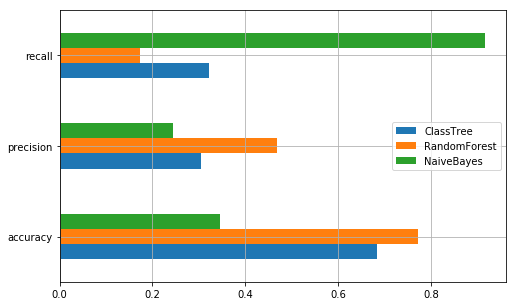

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid()

From the table we can see that Random Forest classifier, has the highest precision and accuracy, this means that Random Forest classifier is the best model for prediction.

In [18]:
precision_ct, recall_ct, threshold_ct = precision_recall_curve(y_true=y_test, 
                                                                probas_pred=class_tree.predict_proba(X_test)[:,1])
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_true=y_test, 
                                                                probas_pred=random_forest.predict_proba(X_test)[:,1])
precision_nb, recall_nb, threshold_nb = precision_recall_curve(y_true=y_test, 
                                                                probas_pred=NBC.predict_proba(X_test)[:,1])

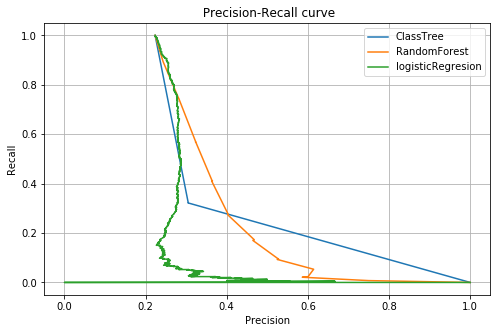

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(precision_ct, recall_ct, label='ClassTree')
ax.plot(precision_rf, recall_rf, label='RandomForest')
ax.plot(precision_nb, recall_nb, label='logisticRegresion')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title(' Precision-Recall curve')
ax.legend()
ax.grid();

From the graph we can see that as the more data is tested the classification tree has the highest recall for the given pression value 



In [20]:
y_pred_proba = class_tree.predict_proba(X_test)[:,1] 
y_pred_test = (y_pred_proba >= 0.2).astype('int')

#confsion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("Recall: ", 100*recall_score(y_pred=y_pred_test, y_true=y_test))
print("Pression: ", 100*precision_score(y_pred=y_pred_test, y_true=y_test))
CMatrix(CM)

Recall:  32.298136645962735
Pression:  30.51643192488263


PREDICTION,pay,default,Total
TRUE,,,
pay,2203,592,2795
default,545,260,805
Total,2748,852,3600


# 6.	 Final predictions on test set

Final predictions on the test set using the model that you have
trained in the previous section.


## Making  predictions 

In [21]:
## Importing the data 
## re-label the headder
header_names = ['ID','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
               'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
               'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
               'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
               'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']

default_test = pd.read_csv(location_test_data, header=None, index_col='ID', skiprows=1, names=header_names)
default_test.drop('ID', axis=0, inplace=True)

##changing the the header to lower case
default_test.rename(columns = lambda x: x.lower(), inplace=True)

##changing the element dtype from object to integer
default_test = default_test.astype(int) 


##as sklearn modle can only work with binary input value 
## base values(values set to 0): female, other_education, no_married(single)
default_test['male'] = default_test['sex'].map( {1:1, 2:0} ).astype(int)
default_test.drop('sex', axis=1, inplace=True)


default_test['grad_school'] = (default_test['education']==1).astype('int')
default_test['university'] = (default_test['education']==2).astype('int')
default_test['high_school'] = (default_test['education']==3).astype('int')
default_test.drop('education', axis=1, inplace=True)

default_test['married'] = (default_test['marriage']==1).astype('int')
default_test['confused'] = (default_test['marriage']==3).astype('int') # some one must be really confused to tick this box in a form 
default_test.drop('marriage', axis=1, inplace=True)



##for pay features if the value <= 0 then it means it was not delayed 
pay_features = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    default_test.loc[default_test[p]<=0, p] = 0



In [22]:
## Identifying the target parameter that we are going to predict.
##and omitting it from the input matrix (X)
y_test_data = default_test.loc[:,['default']].values
X_test_data = default_test.drop('default', axis=1)

#First we identify from the training data and setting it as X
features = ['limit_bal','age','pay_0','pay_2','pay_3','pay_4','pay_5',
            'pay_6','bill_amt1','bill_amt2','bill_amt3','bill_amt4',
            'bill_amt5','bill_amt6','pay_amt1','pay_amt2','pay_amt3',
            'pay_amt4','pay_amt5','pay_amt6','male','grad_school',
            'university','high_school','married','confused' ]
X_test_data = default_test.loc[:, features].values

In [23]:
pd.DataFrame(data=X_test_data, columns=features).head(10)

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,male,grad_school,university,high_school,married,confused
0,50000,23,2,2,0,0,0,0,51246,49758,...,2254,2004,704,707,1,0,1,0,0,0
1,60000,26,0,0,0,0,0,0,58072,59040,...,2049,2000,3000,1120,1,0,1,0,0,0
2,400000,27,0,0,0,0,0,0,15330,8626,...,1437,1105,510,959,1,0,1,0,0,0
3,20000,27,5,4,3,2,2,2,21673,21051,...,0,900,0,0,1,0,0,0,0,0
4,50000,27,0,0,0,0,0,0,32590,-100,...,0,70,200,100,1,0,0,1,0,0
5,110000,27,0,0,0,0,0,0,102551,103550,...,6000,4000,5000,4000,1,0,1,0,0,0
6,30000,23,0,0,0,0,0,0,4443,370,...,601,7504,15005,5674,1,0,0,1,0,0
7,230000,27,0,0,0,0,0,0,34592,23689,...,1293,2000,528,3000,1,0,1,0,0,0
8,20000,23,0,0,0,0,0,0,18455,19990,...,1612,1121,702,1000,1,0,0,1,0,1
9,30000,24,0,0,0,2,0,0,6003,4912,...,0,1500,425,895,1,1,0,0,0,0


In [24]:
X_test_data = pca.transform(X_test_data)

In [25]:
# Returns a NumPy Array
# Predict for One Observation (image)
class_tree.predict(X_test_data)

metrics_new = pd.DataFrame(index=['accuracy', 'precision', 'recall'], 
                        columns=['ClassTree'])

In [26]:
#Evaluate the model 
y_pred_test = class_tree.predict(X_test_data)
metrics_new.loc['accuracy','classTree'] =  accuracy_score(y_pred=y_pred_test, y_true=y_test_data)
metrics_new.loc['precision','classTree'] =  precision_score(y_pred=y_pred_test, y_true=y_test_data)
metrics_new.loc['recall','classTree'] =  recall_score(y_pred=y_pred_test, y_true=y_test_data)

#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test_data)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,4151,583,4734
default,1091,175,1266
Total,5242,758,6000


In [27]:
100*metrics_new 

,ClassTree,classTree
accuracy,NaN,72.100000
precision,NaN,23.087071
recall,NaN,13.823065


The trained classification tree classifier predicted 5115 customer will pay and 885 costumer will default on the payment. the model over estimates the number of people payed and understand estimates the defaulties. We can improve this by training the model with a larger data set. 

A classificationg tree is the most accurate learning algorithms available and  many data sets and unlabeled data, leading to unsupervised clustering. This also means that we can produces a highly accurate classifier as the tree building progresses.

Classification tree have been observed to overfit for some datasets with noisy classification/regression data.Require feature scaling and are harder to explain relatively to Decision Trees.



### References

Towards Data Science. (2019). Dimensionality Reduction — Does PCA really improve classification outcome?. [online] Available at: https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32 [Accessed 3 Jan. 2019].

Ocw.mit.edu. (2019). [online] Available at: https://ocw.mit.edu/courses/sloan-school-of-management/15-062-data-mining-spring-2003/lecture-notes/L3ClassTrees.pdf [Accessed 3 Jan. 2019].

Towards Data Science. (2019). Decision Trees and Random Forests – Towards Data Science. [online] Available at: https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991 [Accessed 3 Jan. 2019].

Towards Data Science. (2019). PCA using Python (scikit-learn) – Towards Data Science. [online] Available at: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 [Accessed 3 Jan. 2019].

Science, D. and codes), T. (2019). Comprehensive Guide to 12 Dimensionality Reduction Techniques. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/ [Accessed 5 Jan. 2019].

Khandani, A., Kim, A. and Lo, A. (2010). Consumer Credit Risk Models Via Machine-Learning Algorithms. SSRN Electronic Journal.

Kang, K. (2018). (Mortgage Loan Prediction:Bayesian Machine Learning Approach). SSRN Electronic Journal.

Fitzpatrick, T. and Mues, C. (2016). An empirical comparison of classification algorithms for mortgage default prediction: evidence from a distressed mortgage market. European Journal of Operational Research, 249(2), pp.427-439.

CrowdProcess Inc. (2017). Machine Learning in Credit Risk Modeling. CrowdProcess Inc.
